In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import gender_guesser.detector as gender
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv('compas-scores-raw.csv')
df

Person_ID  AssessmentID  Case_ID Agency_Text LastName FirstName  \
0          50844         57167    51950    PRETRIAL   Fisher     Kevin   
1          50844         57167    51950    PRETRIAL   Fisher     Kevin   
2          50844         57167    51950    PRETRIAL   Fisher     Kevin   
3          50848         57174    51956    PRETRIAL  KENDALL     KEVIN   
4          50848         57174    51956    PRETRIAL  KENDALL     KEVIN   
...          ...           ...      ...         ...      ...       ...   
60838      65667         79665    72038   Probation     West     James   
60839      65667         79665    72038   Probation     West     James   
60840      68603         79669    72042    PRETRIAL     Ryan   Michael   
60841      68603         79669    72042    PRETRIAL     Ryan   Michael   
60842      68603         79669    72042    PRETRIAL     Ryan   Michael   

      MiddleName Sex_Code_Text  Ethnic_Code_Text DateOfBirth  ...  \
0            NaN          Male         Caucasian    12/05/92  ...   
1            NaN          Male         Caucasian    12/05/92  ...   
2            NaN          Male         Caucasian    12/05/92  ...   
3            NaN          Male         Caucasian    09/16/84  ...   
4            NaN          Male         Caucasian    09/16/84  ...   
...          ...           ...               ...         ...  ...   
60838        NaN          Male  African-American    06/21/64  ...   
60839        NaN          Male  African-American    06/21/64  ...   
60840        NaN          Male         Caucasian    02/06/85  ...   
60841        NaN          Male         Caucasian    02/06/85  ...   
60842        NaN          Male         Caucasian    02/06/85  ...   

       RecSupervisionLevel             RecSupervisionLevelText Scale_ID  \
0                        1                                 Low        7   
1                        1                                 Low        8   
2                        1                                 Low       18   
3                        1                                 Low        7   
4                        1                                 Low        8   
...                    ...                                 ...      ...   
60838                    3  Medium with Override Consideration        8   
60839                    3  Medium with Override Consideration       18   
60840                    1                                 Low        7   
60841                    1                                 Low        8   
60842                    1                                 Low       18   

                     DisplayText RawScore DecileScore ScoreText  \
0               Risk of Violence    -2.08           4       Low   
1             Risk of Recidivism    -1.06           2       Low   
2      Risk of Failure to Appear    15.00           1       Low   
3               Risk of Violence    -2.84           2       Low   
4             Risk of Recidivism    -1.50           1       Low   
...                          ...      ...         ...       ...   
60838         Risk of Recidivism     0.16           8      High   
60839  Risk of Failure to Appear    35.00          10      High   
60840           Risk of Violence    -2.75           2       Low   
60841         Risk of Recidivism    -0.34           5    Medium   
60842  Risk of Failure to Appear    16.00           2       Low   

      AssessmentType  IsCompleted IsDeleted  
0                New            1         0  
1                New            1         0  
2                New            1         0  
3                New            1         0  
4                New            1         0  
...              ...          ...       ...  
60838            New            1         0  
60839            New            1         0  
60840            New            1         0  
60841            New            1         0  
60842            New            1         0  

[60843 rows x 28 columns]

In [3]:
df_filtered = df[(df['DisplayText'] == 'Risk of Violence')]
df_filtered

Person_ID  AssessmentID  Case_ID Agency_Text     LastName  FirstName  \
0          50844         57167    51950    PRETRIAL       Fisher      Kevin   
3          50848         57174    51956    PRETRIAL      KENDALL      KEVIN   
6          50855         57181    51963    PRETRIAL        DAYES     DANIEL   
9          50850         57176    51958    PRETRIAL         Debe   Mikerlie   
12         50839         57162    51945    PRETRIAL     McLaurin  Stephanie   
...          ...           ...      ...         ...          ...        ...   
60828      68595         79656    72031    PRETRIAL         PENA    ROLANDO   
60831      19968         39866    36500    PRETRIAL  BUTTERFIELD      JAMES   
60834      68598         79660    72035    PRETRIAL       SUAREZ   ANDERSON   
60837      65667         79665    72038   Probation         West      James   
60840      68603         79669    72042    PRETRIAL         Ryan    Michael   

      MiddleName Sex_Code_Text  Ethnic_Code_Text DateOfBirth  ...  \
0            NaN          Male         Caucasian    12/05/92  ...   
3            NaN          Male         Caucasian    09/16/84  ...   
6            NaN          Male  African-American    08/25/94  ...   
9         George        Female  African-American    10/09/94  ...   
12        Nicole        Female  African-American    06/29/85  ...   
...          ...           ...               ...         ...  ...   
60828          N          Male          Hispanic    06/13/85  ...   
60831    MICHAEL          Male         Caucasian    09/24/73  ...   
60834        NaN          Male         Caucasian    08/10/81  ...   
60837        NaN          Male  African-American    06/21/64  ...   
60840        NaN          Male         Caucasian    02/06/85  ...   

       RecSupervisionLevel             RecSupervisionLevelText Scale_ID  \
0                        1                                 Low        7   
3                        1                                 Low        7   
6                        4                                High        7   
9                        2                              Medium        7   
12                       1                                 Low        7   
...                    ...                                 ...      ...   
60828                    2                              Medium        7   
60831                    1                                 Low        7   
60834                    1                                 Low        7   
60837                    3  Medium with Override Consideration        7   
60840                    1                                 Low        7   

            DisplayText RawScore DecileScore ScoreText AssessmentType  \
0      Risk of Violence    -2.08           4       Low            New   
3      Risk of Violence    -2.84           2       Low            New   
6      Risk of Violence    -1.20           8      High            New   
9      Risk of Violence    -1.29           7    Medium            New   
12     Risk of Violence    -2.90           2       Low            New   
...                 ...      ...         ...       ...            ...   
60828  Risk of Violence    -1.61           6    Medium            New   
60831  Risk of Violence    -2.50           3       Low            New   
60834  Risk of Violence    -3.12           1       Low            New   
60837  Risk of Violence    -2.03           4       Low            New   
60840  Risk of Violence    -2.75           2       Low            New   

       IsCompleted IsDeleted  
0                1         0  
3                1         0  
6                1         0  
9                1         0  
12               1         0  
...            ...       ...  
60828            1         0  
60831            1         0  
60834            1         0  
60837            1         0  
60840            1         0  

[20281 rows x 28 columns]

In [4]:
df_subset = df_filtered[
    (df_filtered['Ethnic_Code_Text'].isin(['Caucasian', 'Asian', 'African-American', 'African-Am']))].copy()
df_subset['color'] = df_subset.apply(
    lambda row: 0 if row['Ethnic_Code_Text'] in ['African-American', 'African-Am'] else 1, axis=1)
df_subset['gender'] = df_subset.apply(lambda row: 0 if row['Sex_Code_Text'] == "Male" else 1, axis=1)
df_subset['score'] = df_subset['RawScore']
df_subset = df_subset[['color', 'gender', 'score']]
df_subset

color  gender  score
0          1       0  -2.08
3          1       0  -2.84
6          0       0  -1.20
9          0       1  -1.29
12         0       1  -2.90
...      ...     ...    ...
60825      1       0  -1.74
60831      1       0  -2.50
60834      1       0  -3.12
60837      0       0  -2.03
60840      1       0  -2.75

[16392 rows x 3 columns]

<AxesSubplot:>

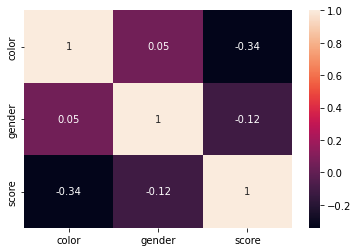

In [5]:
import seaborn as sns

corr_matrix = df_subset.corr()

sns.heatmap(corr_matrix, annot=True,
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns)

In [6]:
df_subset.to_csv('processed_data.csv', index=False)

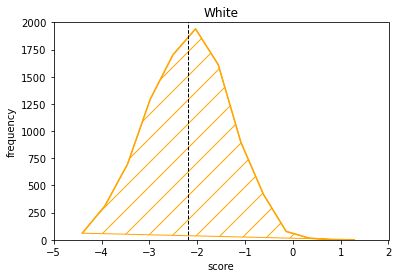

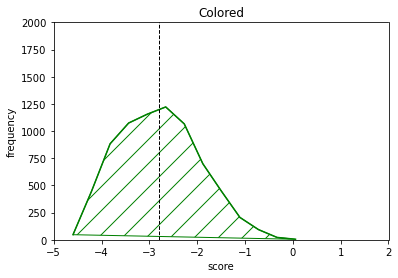

In [7]:
df = df_subset

color = ['orange', 'green']
shape = ['o', '*']

summary = {
    (0, 0): {'mean': 0, 'std': 0, 'count': 0},
    (0, 1): {'mean': 0, 'std': 0, 'count': 0},
    (1, 0): {'mean': 0, 'std': 0, 'count': 0},
    (1, 1): {'mean': 0, 'std': 0, 'count': 0}
}

title = ['White', "Colored"]

for i in [0, 1]:
    subset = df[(df['color'] == i)]['score']
    y, binEdges = np.histogram(subset, bins=13)
    bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
    plt.plot(bincenters, y, '-', c=color[i])
    plt.fill(bincenters, y, hatch='/', fill=False, color=color[i])
    plt.axvline(subset.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.title(title[i])
    plt.ylabel('frequency')
    plt.xlabel('score')
    plt.axis([-5, 2, 0, 2000])
    plt.show()

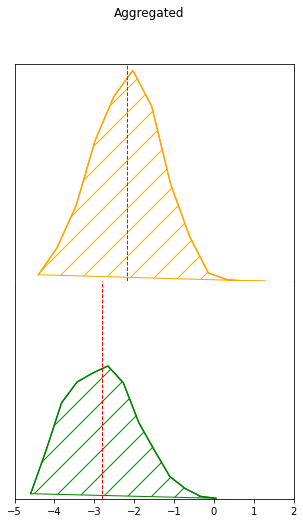

In [8]:
df = df_subset

color = ['orange', 'green']
shape = ['o', '*']

summary = {
    (0, 0): {'mean': 0, 'std': 0, 'count': 0},
    (0, 1): {'mean': 0, 'std': 0, 'count': 0},
    (1, 0): {'mean': 0, 'std': 0, 'count': 0},
    (1, 1): {'mean': 0, 'std': 0, 'count': 0}
}

title = ['White', "Colored"]

fig, axis = plt.subplots(nrows=2, sharex=True, figsize=(5, 8))
fig.suptitle('Aggregated')
plt.subplots_adjust(hspace=0)
# fig.patch.set_linewidth(4)
# fig.patch.set_edgecolor('black')
l = []

for i in [0, 1]:
    subset = df[(df['color'] == i)]['score']
    y, binEdges = np.histogram(subset, bins=13)
    bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
    axis[i].axis([-5, 2, 0, 2000])
    axis[i].plot(bincenters, y, '-', c=color[i])
    axis[i].fill(bincenters, y, hatch='/', fill=False, color=color[i])
    axis[i].axvline(subset.mean(), color='r', linestyle='dashed', linewidth=1)
    axis[i].get_yaxis().set_visible(False)
    axis[i].get_xaxis().set_visible(False) if i != 1 else axis[i].get_xaxis().set_visible(True)
    axis[i].spines['bottom'].set_visible(False) if i != 1 else axis[i].spines['top'].set_visible(False)

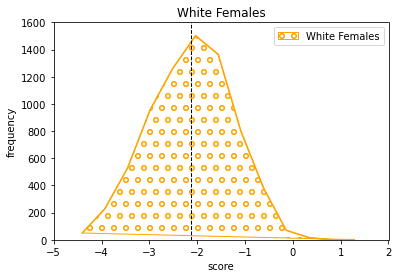

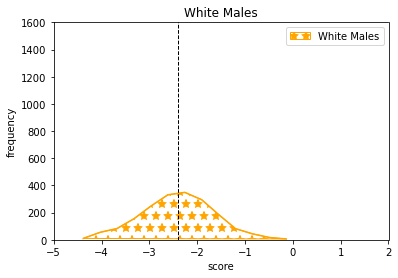

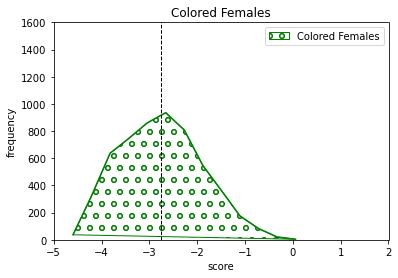

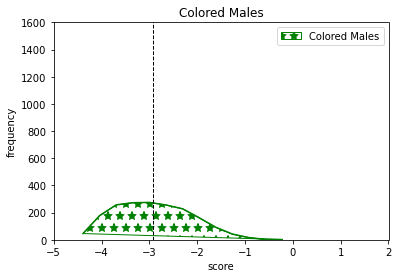

In [11]:
color = ['orange', 'green']
shape = ['o', '*']

summary = {
    (0, 0): {'mean': 0, 'std': 0},
    (0, 1): {'mean': 0, 'std': 0},
    (1, 0): {'mean': 0, 'std': 0},
    (1, 1): {'mean': 0, 'std': 0}
}

title = [['White Females', 'White Males'], ['Colored Females', 'Colored Males']]

for i in [0, 1]:
    for j in [0, 1]:
        subset = df[(df['color'] == i) & (df['gender'] == j)]['score']
        summary[(i, j)] = {'mean': np.mean(subset), 'std': np.std(subset), 'count': subset.shape[0]}

        y, binEdges = np.histogram(subset, bins=13)
        bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
        plt.plot(bincenters, y, '-', c=color[i])
        plt.fill(bincenters, y, hatch=shape[j], fill=False, color=color[i], label=title[i][j])
        plt.axvline(subset.mean(), color='k', linestyle='dashed', linewidth=1)
        plt.title(title[i][j])
        plt.ylabel('frequency')
        plt.xlabel('score')
        plt.axis([-5, 2, 0, 1600])
        plt.legend()
        plt.show()

In [12]:
summary

{(0, 0): {'mean': -2.1285506841664343,
  'std': 0.8585817387300181,
  'count': 7162},
 (0, 1): {'mean': -2.400354648038684, 'std': 0.755255975386461, 'count': 1861},
 (1, 0): {'mean': -2.7631341397364126,
  'std': 0.8537458842677781,
  'count': 5539},
 (1, 1): {'mean': -2.919311475409835,
  'std': 0.7845735789569244,
  'count': 1830}}

In [13]:
def sample_size(population, size):
    if size is None:
        cochran_n = round(((1.96)**2 * 0.5 * 0.5)/ 0.02**2)
        n = round(cochran_n/(1+((cochran_n -1) /population)))
    elif size >= 0 and size < 1:
        n = round(population * size)
    elif size < 0:
        raise ValueError('Parameter "size" must be an integer or a proportion between 0 and 0.99.')
    elif size >= 1:
        n = size
    return n

def sample(df, strata, size=None, seed=None, keep_index= True):
    population = len(df)
    size = sample_size(population, size)
    tmp = df[strata]
    tmp['size'] = 1
    tmp_grpd = tmp.groupby(strata).count().reset_index()
    tmp_grpd['samp_size'] = round(size/population * tmp_grpd['size']).astype(int)

    # controlling variable to create the dataframe or append to it
    first = True
    for i in range(len(tmp_grpd)):
        # query generator for each iteration
        qry=''
        for s in range(len(strata)):
            stratum = strata[s]
            value = tmp_grpd.iloc[i][stratum]
            n = tmp_grpd.iloc[i]['samp_size']

            if type(value) == str:
                value = "'" + str(value) + "'"

            if s != len(strata)-1:
                qry = qry + stratum + ' == ' + str(value) +' & '
            else:
                qry = qry + stratum + ' == ' + str(value)

        # final dataframe
        if first:
            stratified_df = df.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            first = False
        else:
            tmp_df = df.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            stratified_df = stratified_df.append(tmp_df, ignore_index=True)

    return stratified_df.sample(frac=1).reset_index(drop=True)

In [14]:
def df_to_operating_tuple(df):
    return [(item['score'], (int(item['color']), int(item['gender']))) for index, item in df.iterrows()]

In [15]:
def generate(df, f = [0.5, 0.5], N = [2000, 2000]):
    data = []
    for i in [0, 1]:
        for j in [0, 1]:
            len_a = (1 - f[i]) * N[i] if j == 0 else f[i] * N[i]
            data.append(sample(df, i, j, int(len_a)))
    return pd.concat(data).sample(frac=1).reset_index(drop=True)

In [16]:
# return individuals with top percieved qualities
def getTop(df, top = 0.1):
    data = df.copy().sort_values(by='score', ascending=False)
    items = data[:int(data.shape[0] * top)]
    return df_to_operating_tuple(items)

# return individuals top individuals after debiasing
def getTopDebiased(df, top = 0.1):
    # Debiasing is always on the visible (first) attribute
    # Allocate proportional quotas
    df_q0 = df[(df['color'] == 0)].copy().sort_values(by='score', ascending=False)
    df_q1 = df[(df['color'] == 1)].copy().sort_values(by='score', ascending=False)

    items_q0 = df_q0[:int(df_q0.shape[0] * top)]
    items_q1 = df_q1[:int(df_q1.shape[0] * top)]

    return df_to_operating_tuple(items_q0) + df_to_operating_tuple(items_q1)

In [17]:
# Compute chances to be in top k% for aggregated groups before and after debiasing
# d => fixed biases []
# f => number of elements
def get_aggregated(data, N, Nsim, k_range):
    results = {'original': {0: [], 1: []},
               'debiased': {0: [], 1: []}}

    # shapes(invisible) => 0: circle; 1: stars
    # colors(visible) => 0: orange; 1: green
    groups = [0, 1]

    for k in k_range:
        simulations = {'original': {0: [], 1: []},
                       'debiased': {0: [], 1: []}}

        for i in tqdm(range(0, Nsim), 'Simulations for top : {}'.format(k*100)):

            # properties, perceived qualities and real qualities
            df_gen = sample(data, ['color', 'gender'], N)

            for group in groups:

                # compute expected chances to be in top
                exp = df_gen[(df_gen['color'] == group)].shape[0] / df_gen.shape[0]

                for approach in ['original', 'debiased']:

                    if approach == 'original':
                        top = getTop(df_gen, k)
                    else:
                        top = getTopDebiased(df_gen, k)

                    # compute real chances to be in top
                    real = len([x for x in top if x[1][0] == group]) / len(top)

                    simulations[approach][group].append((real - exp) / exp)

        for group in [0, 1]:
            for approach in ['original', 'debiased']:
                results[approach][group].append(np.mean(simulations[approach][group]))
    return results

In [18]:
def plot_aggregated(results):
    colors = ['orange', 'green']
    styles = {'original': '-', 'debiased': '--'}

    for approach in ['original', 'debiased']:
        for group in [0, 1]:
            plt.plot(k_range, results[approach][group], color = colors[group], ls = styles[approach])
    plt.axhline(0, color='k', linestyle='dashed', linewidth=1)
    plt.xlabel('top k')
    plt.ylabel('representation bias')

In [19]:
# for quick results
Nsim = 5
print('Number of Simulations : ', Nsim)

# to fetch top k% candidates
k_range = [i / 100 for i in range(1, 101, 5)]
print('Ranking Indexes : ', k_range)

Number of Simulations :  5
Ranking Indexes :  [0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51, 0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96]


Simulations for top : 1.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 6.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 11.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 16.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 21.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 26.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 31.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 36.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 41.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 46.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 51.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 56.00000000000001:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 61.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 66.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 71.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 76.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 81.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 86.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 91.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 96.0:   0%|          | 0/5 [00:00<?, ?it/s]

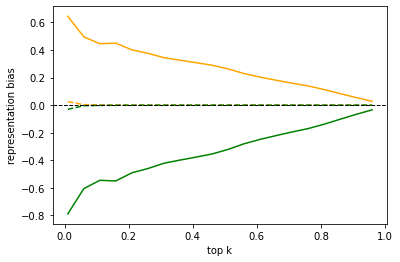

In [20]:
results_agg = get_aggregated(df, 4000, Nsim, k_range)
plot_aggregated(results_agg)

In [21]:
# Compute chances to be in top k% for disaggregated groups before and after debiasing
def get_disaggregated(data, N, Nsim, k_range):
    groups = [(0,0),(0,1),(1,0),(1,1)]

    results = {'original': {g:[] for g in groups},
               'debiased': {g:[] for g in groups}}

    for k in k_range:
        simulations = {'original': {g:[] for g in groups},
                       'debiased': {g:[] for g in groups}}

        for i in tqdm(range(0, Nsim), 'Simulations for top : {}'.format(k*100)):
            df_gen = sample(data, ['color', 'gender'], N)

            for g in groups:
                # compute expected chances to be in top
                # exp = len([x for x in a if x == g]) / len(q)
                exp = df_gen[(df_gen['color'] == g[0]) & (df_gen['gender'] == g[1])].shape[0] / df_gen.shape[0]
                for approach in ['original', 'debiased']:
                    if approach == 'original':
                       top = getTop(df_gen, k)
                    else:
                       top = getTopDebiased(df_gen, k)

                    # compute real chances to be in top
                    real = len([x for x in top if x[1] == g]) / len(top)
                    simulations[approach][g].append((real - exp) / exp)

        for g in groups:
            for approach in ['original', 'debiased']:
                results[approach][g].append(np.mean(simulations[approach][g]))
    return results

In [22]:
def plot_disaggregated(results):
    groups = [(0,0),(0,1),(1,0),(1,1)]
    fill = {'original': 'full', 'debiased': 'none'}
    colors = ['orange', 'green']
    shapes = ['o', '*']
    for g in groups:
        for approach in ['original', 'debiased']:
            plt.plot(k_range, results[approach][g], shapes[g[1]], color = colors[g[0]], lw = 2, fillstyle = fill[approach])
    plt.axhline(0, color='k', linestyle='dashed', linewidth=1)
    plt.fill_between(k_range, results['debiased'][(0,1)], results['original'][(0,1)], color='orange', alpha=.25)
    plt.xlabel('top k')
    plt.ylabel('representation bias')

In [23]:
results = get_disaggregated(df, 4000, Nsim, k_range)

Simulations for top : 1.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 6.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 11.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 16.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 21.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 26.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 31.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 36.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 41.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 46.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 51.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 56.00000000000001:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 61.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 66.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 71.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 76.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 81.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 86.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 91.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for top : 96.0:   0%|          | 0/5 [00:00<?, ?it/s]

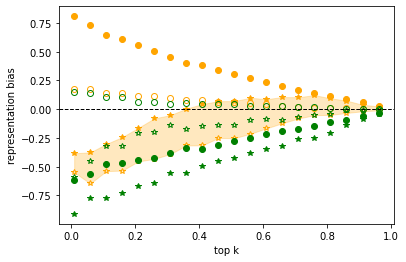

In [24]:
plot_disaggregated(results)

In [25]:
np.save('results_main_compas.npy', {'agg': results_agg, 'diss_agg': results})

In [26]:
read_dictionary = np.load('results_main_compas.npy', allow_pickle='TRUE').item()
read_dictionary

{'agg': {'original': {0: [0.6443710263396911,
    0.49446980018165315,
    0.44532862686813646,
    0.44904518619436884,
    0.400808572293586,
    0.375666963599525,
    0.3442755119978905,
    0.3256416515289131,
    0.30800729935092264,
    0.2894665422738223,
    0.26262613310537664,
    0.2290602698845206,
    0.20308207144027035,
    0.1804893622877275,
    0.15903141830090448,
    0.1390819649600842,
    0.11307128199952905,
    0.08353550155249985,
    0.05484938766955126,
    0.027731891462307014],
   1: [-0.7887187326292384,
    -0.6052376320177877,
    -0.5450881803021881,
    -0.5496372984991662,
    -0.4905950395722492,
    -0.45982137512293153,
    -0.4213978195771845,
    -0.3985897257735779,
    -0.3770050434523245,
    -0.3543109094424438,
    -0.3214578905492158,
    -0.28037282617327086,
    -0.24857516470899138,
    -0.22092138730271027,
    -0.194656577597883,
    -0.17023818056815193,
    -0.13840075762254753,
    -0.10224856832607268,
    -0.06713638223921715,
  